# Projeto 1 - Análise Exploratória de Dados

## <a>Motivação</a>

Todo trabalho de Ciência de Dados passa por essa importante etapa. Conhecer bem os dados, saber as distribuições, medidas estatísticas principais, visualizar correlações e evoluções é essencial para gerar insights e solucionar problemas.

Essa etapa é bem *híbrida* no sentido em que pode ser utilizada sem um objetivo completamente definido, numa busca por informações e insights. De outro lado, num projeto com objetivo de negócio bem definido (fase 1 do CRISP-DM), ela é bem focalizada nas perguntas de negócio que queremos responder

## <a>Objeto de Estudo</a>
Vamos trabalhar com informações de microdados no ENEM realizado em 2020. De acordo com o site do [INEP](https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem), o ENEM tem o objetivo de avaliar o desempenho escolar dos estudantes ao término da educação básica. As notas do Enem podem ser usadas para acesso ao Sistema de Seleção Unificada (Sisu) e ao Programa Universidade para Todos (ProUni). Elas também são aceitas em mais de 50 instituições de educação superior portuguesas. Além disso, os participantes do Enem podem pleitear financiamento estudantil em programas do governo, como o Fundo de Financiamento Estudantil (Fies). Os resultados do Enem possibilitam, ainda, o desenvolvimento de estudos e indicadores educacionais.[1](https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem)

Conhecer bem os dados dos aplicantes para a prova pode fornecer insights preciosos para a educação brasileira. Para o presente estudo vamos avaliar se dados demográficos, indicadores sociais, de escolaridade dos pais e outras indicações tem correlações com as notas dos candidatos. Muitos insights e respostas podem ser obtidas somente com a análise exploratória de dados.

<b>Fonte dos dados</b>
https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

In [1]:
# Bibliotecas para leitura de dados e criacao de graficos
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

# configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# configurando pandas para nao mostrar notacao cientifica para numeros
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# instalando pyarrow para converter em Parquet
#!pip install pyarrow

In [3]:
# Convertendo csv em parquet
#df_enem_csv = pd.read_csv('./dadosEnem/enem2020.csv', sep=';', encoding='latin1')
#df_enem_csv.to_parquet('./dadosEnem/enem2020.parquet')
# Deixarei comentado pois o arquivo ja foi gerado

In [4]:
df_enem = pd.read_parquet('./dadosEnem/enem2020.parquet')
df_enem.shape

(5783109, 76)

In [5]:
# Caso nao tenha muita memoria:
df_enem_simples = df_enem.sample(n=len(df_enem)//10, random_state=42, replace=False)
df_enem_simples.shape

(578310, 76)

In [8]:
# salvando esse arquivo menor, com 10%
df_enem_simples.to_parquet('./dadosEnem/enem_2020_amostra_10.parquet')

In [6]:
# Visualizando alguns dos dados
df_enem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,1501402,Belém,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,200001195856,2020,11,M,2,3,1,1,11,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,2408102,Natal,24,RN,1,1,1,1,702.00,689.00,693.00,698.00,604.10,661.70,595.30,711.30,BCBDBDCCCDBDDBADEEACEEAECBECCDBCACDEBEECEBAAE,BCAECABCDCEBDBBBDAABABACBCDDDBDDBABDAADACACBC,99999CADDEDADBAABEAADAAAADCADAABDCCBEECAEECAAC...,EBEBDEDAECBADCADDABACAEDBEEEAEADCCBCEACDACEBB,1,ABBACBCCCDDDDBAEEBECEDACABDCBEDAECDABECCBBADE,BCEECDBCCDEBDBBBBEAAAEACBCDDDBDDBABDABDDBAABC,99999CBDDEDBDBACECABAAAEAECCDCABCBBBBEEDCECAAE...,BBEADECAECBBXCEBADBACAEDACEDADAADCBCCBBDABBEE,1.00,120.00,120.00,120.00,120.00,100.00,580.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,200001943954,2020,4,F,2,3,2,2,0,2,1.00,0,2927408.00,Salvador,29.00,BA,2.00,1.00,1.00,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.00,B,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,1.00,0,3547304.00,Santana de Parnaíba,35.00,SP,3.00,1.00,1.00,3547304,Santana de Parnaíba,35,SP,1,1,1,1,700.00,688.00,692.00,696.00,620.80,675.00,624.20,759.40,EBEDCCCDCBDBAECAECCECEACCBAABBBCEABCAAAEBEBAE,DABCCACCBCCDCADBDCBAAEBDDBAABDBAEBEBBABDABDBE,DCEAB99999AADAECCEBCDDDCBABDDABBCEEBAEDDDADEBE...,CBDBDCCDDEECBAABBBADEDEDBECDEBBADAEBAABBECBBA,0,BDECCACBEBDEAEDAECCBAEABCCEADDBBCADCBDDEBDBAC,DABCCAECBABECADBDCCABDBCDDAABDBAEBEBBDBDDBDBE,DCEAD99999AADACCCCBBDDCABAECAABBEECBAEDDBBEEBE...,EBDBXCCDAEECBAABABAEDDEDAECBCDCADEEBBABBACBCA,1.00,140.00,200.00,140.00,120.00,160.00,760.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,200001634757,2020,4,F,1,3,2,1,1,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,3121605,Diamantina,31,MG,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.00,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B


In [9]:
# Checando se cada linha é um candidato
len(df_enem['NU_INSCRICAO'].unique())

5783109

In [10]:
# Analisando os tipos dos dados de cada coluna
df_enem.dtypes

NU_INSCRICAO                int64
NU_ANO                      int64
TP_FAIXA_ETARIA             int64
TP_SEXO                    object
TP_ESTADO_CIVIL             int64
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
CO_MUNICIPIO_ESC          float64
NO_MUNICIPIO_ESC           object
CO_UF_ESC                 float64
SG_UF_ESC                  object
TP_DEPENDENCIA_ADM_ESC    float64
TP_LOCALIZACAO_ESC        float64
TP_SIT_FUNC_ESC           float64
CO_MUNICIPIO_PROVA          int64
NO_MUNICIPIO_PROVA         object
CO_UF_PROVA                 int64
SG_UF_PROVA                object
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
TP_PRESENCA_MT              int64
CO_PROVA_CN               float64
CO_PROVA_CH               float64
CO_PROVA_LC   

## <a>Limpando alguns dados</a>

In [12]:
# Primeiro, remover as colunas com as respostas
colunas_questoes = [coluna for coluna in df_enem.columns if coluna.startswith('TX_')]
colunas_questoes

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [13]:
# Da mesma forma, colunas do tipo CO_ tambem nao servem para a analise
colunas_codigos = [coluna for coluna in df_enem.columns if coluna.startswith('CO_')]
colunas_codigos

['CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT']

In [14]:
# Tambem nao analisaremos por municipio
colunas_municipios = [coluna for coluna in df_enem.columns if 'MUNICIPIO' in coluna]
colunas_municipios

['CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

In [16]:
# Por fim, removendo essas colunas
colunas_remover = colunas_questoes + colunas_codigos + colunas_municipios + ['NU_INSCRICAO', 'NU_ANO']
df_enem = df_enem.drop(colunas_remover, axis=1)
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,11,F,1,2,1,1,11,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,11,M,2,3,1,1,11,1,NaN,0,None,NaN,NaN,NaN,RN,1,1,1,1,604.10,661.70,595.30,711.30,1,1.00,120.00,120.00,120.00,120.00,100.00,580.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,4,F,2,3,2,2,0,2,1.00,0,BA,2.00,1.00,1.00,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.00,B,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,A
3,2,M,1,3,1,2,0,2,1.00,0,SP,3.00,1.00,1.00,SP,1,1,1,1,620.80,675.00,624.20,759.40,0,1.00,140.00,200.00,140.00,120.00,160.00,760.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,4,F,1,3,2,1,1,1,NaN,0,None,NaN,NaN,NaN,MG,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.00,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B


In [17]:
df_enem.shape

(5783109, 56)

## <a>Dicionário de dados</a>
Percebemos que muitas das colunas possuem somente números, sem descrições. Os dados do ENEM vem acompanhados das descrições com o dicionário, explicando o que cada coluna representa. Seguem algumas que vamos utilizar na análise

Estado Civil (TP_ESTADO_CIVIL)

| Código | Descrição                               |
|--------|-----------------------------------------|
|    0   | Não informado                           |
|    1   | Solteiro(a)                             |
|    2   | Casado(a)/Mora   com companheiro(a)     |
|    3   | Divorciado(a)/Desquitado(a)/Separado(a) |
|    4   | Viúvo(a)                                |

Cor/Raça (TP_COR_RACA)

| Código | Descrição     |
|--------|---------------|
| 0      | Não declarado |
| 1      | Branca        |
| 2      | Preta         |
| 3      | Parda         |
| 4      | Amarela       |
| 5      | Indígena      |

Tipo Nacionalidade

| Código | Descrição                                       |
|--------|-------------------------------------------------|
| 0      | Não informado                                   |
| 1      | Brasileiro(a)                                   |
| 2      | Brasileiro(a)   Naturalizado(a)                 |
| 3      | Estrangeiro(a)                                  |
| 4      | Brasileiro(a)   Nato(a), nascido(a) no exterior |
| 5      | Indígena                                        |

Situação de Conclusão Nível Médio

| Código | Descrição                                              |
|--------|--------------------------------------------------------|
| 1      | Já concluí o   Ensino Médio                            |
| 2      | Estou   cursando e concluirei o Ensino Médio em 2019   |
| 3      | Estou   cursando e concluirei o Ensino Médio após 2019 |
| 4      | Não   concluí e não estou cursando o Ensino Médio      |

Finalmente, as colunas de notas

| Coluna     | Descrição                             |
|------------|---------------------------------------|
| NU_NOTA_CN | Nota da prova de Ciências da Natureza |
| NU_NOTA_CH | Nota da prova de Ciências Humanas     |
| NU_NOTA_LC | Nota da prova de Linguagens e Códigos |
| NU_NOTA_MT | Nota da prova de Matemática           |

## <a>Estatística descritiva</a>
Conhecer bem as medidas estatísticas, de tendência central, dispersão, separatrizes, distribuições, é essencial para conhecermos melhor os dados em que estamos trabalhando. Qual a distribuição por sexo? Raça? Localização geográfica?

In [18]:
df_enem.describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,5783109.00,5783109.00,5783109.00,5783109.00,5783109.00,5783109.00,5783109.00,1303446.00,5783109.00,904569.00,904569.00,904569.00,5783109.00,5783109.00,5783109.00,5783109.00,2597440.00,2754140.00,2754140.00,2597440.00,5783109.00,2754140.00,2754140.00,2754140.00,2754140.00,2754140.00,2754140.00,2754140.00,5687143.00
mean,6.40,1.10,2.15,1.03,1.45,3.32,1.28,1.01,0.10,2.44,1.03,1.01,0.45,0.48,0.48,0.45,490.41,511.15,523.80,520.58,0.54,1.11,119.73,121.89,110.34,123.49,97.96,573.41,3.71
std,4.17,0.48,1.01,0.21,0.69,4.54,0.52,0.08,0.30,0.91,0.18,0.18,0.50,0.50,0.50,0.50,80.00,96.22,74.55,117.31,0.50,0.73,33.30,50.66,44.47,38.31,58.87,199.82,1.47
min,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,3.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,427.00,435.30,478.00,425.80,0.00,1.00,100.00,120.00,80.00,100.00,40.00,460.00,3.00
50%,5.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,483.70,512.50,529.90,505.10,1.00,1.00,120.00,120.00,120.00,120.00,100.00,580.00,4.00
75%,11.00,1.00,3.00,1.00,2.00,5.00,1.00,1.00,0.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,548.70,580.60,576.40,602.30,1.00,1.00,140.00,160.00,140.00,140.00,140.00,700.00,4.00
max,20.00,4.00,5.00,4.00,4.00,14.00,3.00,2.00,1.00,4.00,2.00,4.00,2.00,2.00,2.00,2.00,854.80,862.60,801.10,975.00,1.00,9.00,200.00,200.00,200.00,200.00,200.00,1000.00,20.00


In [20]:
coluna_notas = [coluna for coluna in df_enem if 'NOTA' in coluna]
coluna_notas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [21]:
# Deixando apenas as notas principais de redacao
coluna_notas = [coluna for coluna in coluna_notas if 'COMP' not in coluna]
coluna_notas

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

## Analisando as notas


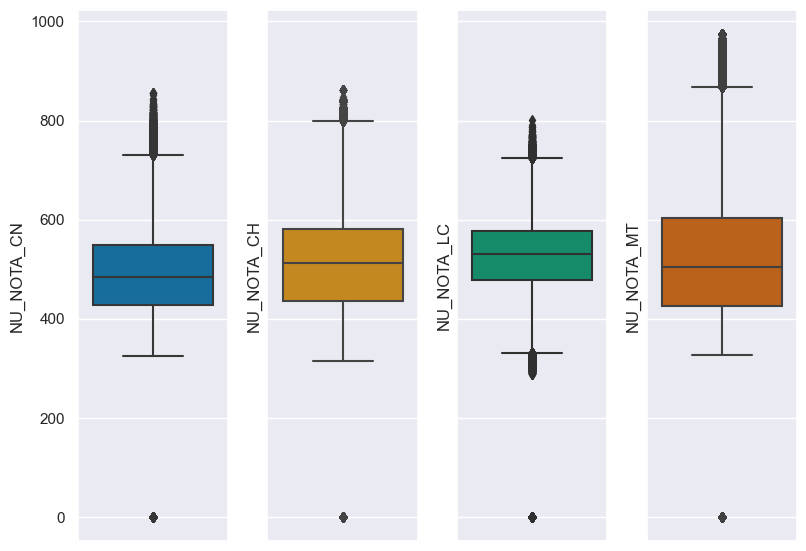

In [148]:
sns.set_style('darkgrid')
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()
cores = sns.color_palette('colorblind') # definindo a paleta de cores a ser usada por todo o notebook

for i in range(4):
    coluna_1 = coluna_notas[i]
    sns.boxplot(data=df_enem, y=coluna_1, ax=graficos[i], color=cores[i])

## Analisando a distribuicao das notas


Text(0.5, 33.249999999999986, ' ')

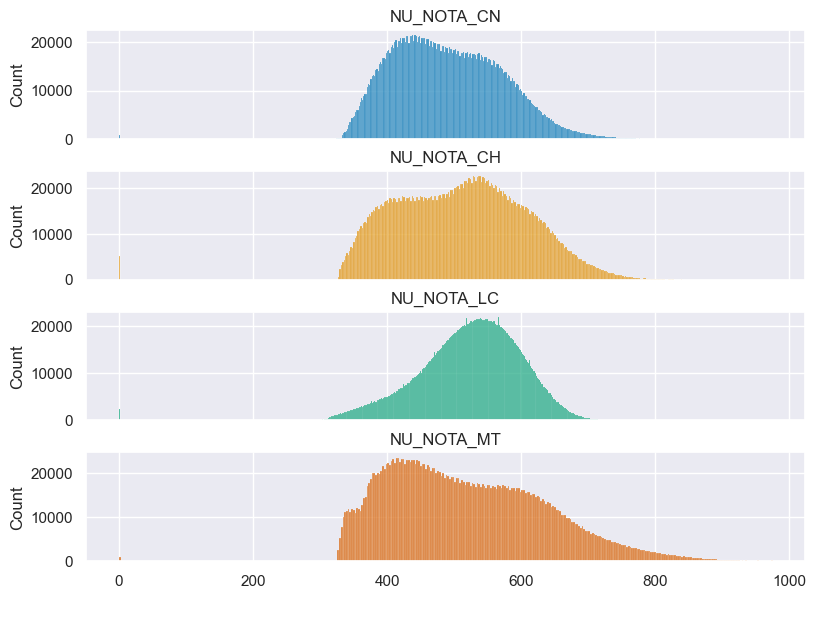

In [195]:
sns.set_style('darkgrid')
figura, graficos = plt.subplots(4, 1, sharex=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = coluna_notas[i]
    sns.histplot(data=df_enem[coluna_1], ax=graficos[i], color=cores[i]).set_title(coluna_1)
plt.xlabel(' ')

## Analisando as notas de redação


Text(0, 0.5, 'Densidade')

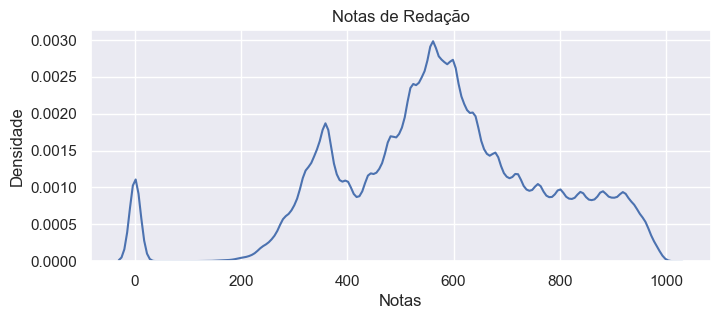

In [196]:
sns.set(rc={'figure.figsize':(8, 3)})
sns.kdeplot(data=df_enem['NU_NOTA_REDACAO']).set_title('Notas de Redação')
plt.xlabel('Notas')
plt.ylabel('Densidade')

## <a>Analisando as informacoes demográficas</a>

In [34]:
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,11,F,1,2,1,1,11,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,11,M,2,3,1,1,11,1,NaN,0,None,NaN,NaN,NaN,RN,1,1,1,1,604.10,661.70,595.30,711.30,1,1.00,120.00,120.00,120.00,120.00,100.00,580.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,4,F,2,3,2,2,0,2,1.00,0,BA,2.00,1.00,1.00,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.00,B,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,A
3,2,M,1,3,1,2,0,2,1.00,0,SP,3.00,1.00,1.00,SP,1,1,1,1,620.80,675.00,624.20,759.40,0,1.00,140.00,200.00,140.00,120.00,160.00,760.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,4,F,1,3,2,1,1,1,NaN,0,None,NaN,NaN,NaN,MG,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.00,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B


In [35]:
# Reiniciando os indices
df_enem = df_enem.reset_index(drop=True)
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,11,F,1,2,1,1,11,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,11,M,2,3,1,1,11,1,NaN,0,None,NaN,NaN,NaN,RN,1,1,1,1,604.10,661.70,595.30,711.30,1,1.00,120.00,120.00,120.00,120.00,100.00,580.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,4,F,2,3,2,2,0,2,1.00,0,BA,2.00,1.00,1.00,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.00,B,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,A
3,2,M,1,3,1,2,0,2,1.00,0,SP,3.00,1.00,1.00,SP,1,1,1,1,620.80,675.00,624.20,759.40,0,1.00,140.00,200.00,140.00,120.00,160.00,760.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,4,F,1,3,2,1,1,1,NaN,0,None,NaN,NaN,NaN,MG,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.00,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B


## Analisando a faixa etária dos candidatos


- 1	Menor de 17 anos
- 2	17 anos
- 3	18 anos
- 4	19 anos
- 5	20 anos
- 6	21 anos
- 7	22 anos
- 8	23 anos
- 9	24 anos
- 10	25 anos
- 11	Entre 26 e 30 anos
- 12	Entre 31 e 35 anos
- 13	Entre 36 e 40 anos
- 14	Entre 41 e 45 anos
- 15	Entre 46 e 50 anos
- 16	Entre 51 e 55 anos
- 17	Entre 56 e 60 anos
- 18	Entre 61 e 65 anos
- 19	Entre 66 e 70 anos
- 20	Maior de 70 anos

In [36]:
df_enem['TP_FAIXA_ETARIA'].value_counts().sort_index()

1     336805
2     775404
3     887715
4     609450
5     459606
6     353734
7     274709
8     239812
9     204689
10    177344
11    575442
12    341808
13    235027
14    143795
15     86079
16     47539
17     22383
18      8144
19      2693
20       931
Name: TP_FAIXA_ETARIA, dtype: int64

[Text(0.5, 0, 'Faixa Etária'), Text(0, 0.5, 'Quantidade')]

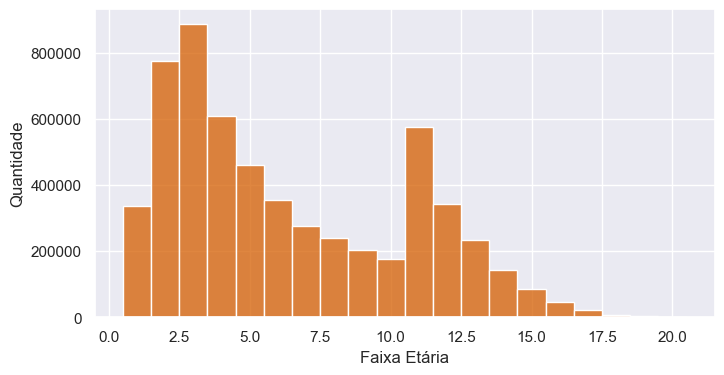

In [185]:
ax = sns.histplot(data=df_enem, x='TP_FAIXA_ETARIA', bins=20, discrete=True, color=cores[i])
ax.set(xlabel='Faixa Etária', ylabel='Quantidade')

## Analisando o sexo dos candidatos


In [48]:
df_enem['TP_SEXO'].value_counts()

F    3468805
M    2314304
Name: TP_SEXO, dtype: int64

In [49]:
# em porcentagem
df_enem['TP_SEXO'].value_counts(normalize=True) * 100

F   59.98
M   40.02
Name: TP_SEXO, dtype: float64

[Text(0.5, 0, 'Sexo'), Text(0, 0.5, 'Quantidade')]

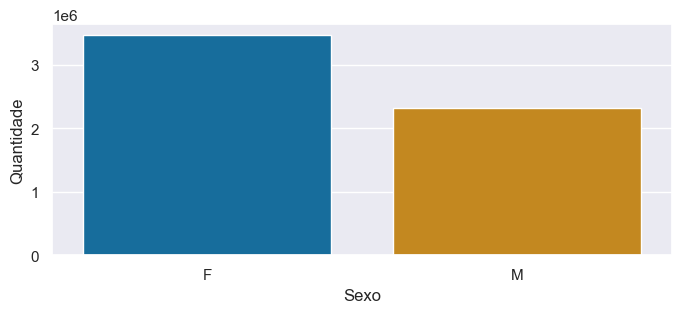

In [198]:
ax = sns.countplot(data=df_enem, x='TP_SEXO', palette='colorblind')
ax.set(xlabel='Sexo', ylabel='Quantidade')

## Analisando o estado civil dos candidatos


In [55]:
'''
0 Não informado
1 Solteiro(a)
2 Casado(a)/Mora com companheiro(a)
3 Divorciado(a)/Desquitado(a)/Separado(a)
4 Viúvo(a)
'''
df_enem['TP_ESTADO_CIVIL'].value_counts().sort_index()

0     263848
1    4851310
2     527734
3     131423
4       8794
Name: TP_ESTADO_CIVIL, dtype: int64

[Text(0.5, 0, 'Estado Civil'), Text(0, 0.5, 'Quantidade')]

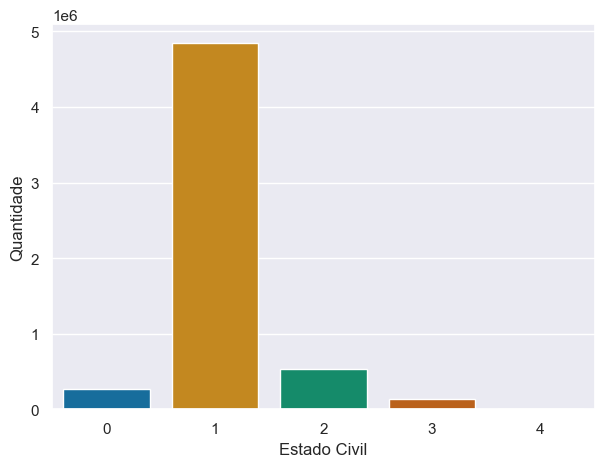

In [205]:
ax = sns.countplot(data=df_enem, x='TP_ESTADO_CIVIL', palette='colorblind')
ax.set(xlabel='Estado Civil', ylabel='Quantidade')

## Analisando a raça dos candidatos
- 0 Não declarado 
- 1 Branca 
- 2 Preta 
- 3 Parda
- 4 Amarela
- 5 Indígena 

In [58]:
df_enem['TP_COR_RACA'].value_counts().sort_index()

0     116883
1    2007633
2     771740
3    2720485
4     128522
5      37846
Name: TP_COR_RACA, dtype: int64

[Text(0.5, 0, 'Raça'), Text(0, 0.5, 'Quantidade')]

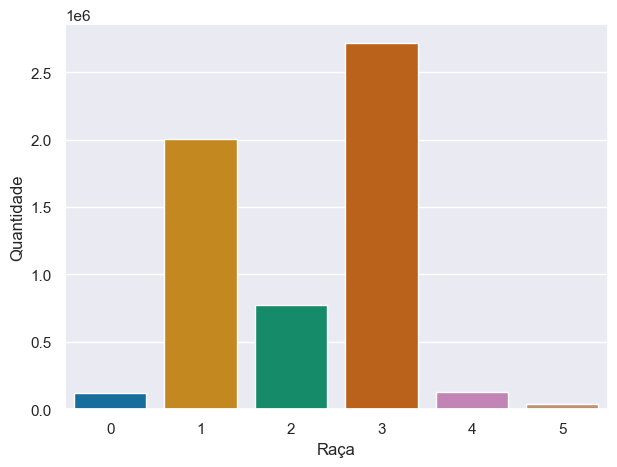

In [208]:
ax = sns.countplot(data=df_enem, x='TP_COR_RACA', palette='colorblind')
ax.set(xlabel='Raça', ylabel='Quantidade')

## Analisando a UF das escolas onde os alunos realizaram a prova


In [62]:
ufs = df_enem['SG_UF_ESC'].value_counts()
ufs

SP    167183
CE    104981
MG     71614
RJ     62583
PE     47583
BA     47235
PR     43060
GO     39769
RS     36478
PA     33109
AM     30120
SC     27373
MA     26104
DF     19840
PB     19760
ES     18419
PI     15738
MT     14674
RN     14327
AL     13976
MS     11851
SE     10878
RO      9927
TO      8457
AP      3565
AC      3512
RR      2453
Name: SG_UF_ESC, dtype: int64

In [76]:
df_ufs = pd.DataFrame({'uf': ufs.index, 'candidatos': ufs.values})
df_ufs.head()

,uf,candidatos
0,SP,167183
1,CE,104981
2,MG,71614
3,RJ,62583
4,PE,47583


In [77]:
import plotly.express as px

fig = px.treemap(data_frame=df_ufs,
                path=['uf'],
                 values='candidatos',
                 title='Quantidade de candidatos por UF'
                )
fig.update_traces(root_color='#f2f2ed')
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

## Analisando o nível de escolaridade dos pais ou responsáveis

- A Nunca estudou.
- B Não completou a 4ª série/5º ano do Ensino Fundamental.
- C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
- D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
- E Completou o Ensino Médio, mas não completou a Faculdade.
- F Completou a Faculdade, mas não completou a Pós-graduação.
- G Completou a Pós-graduação.
- H Não sei.

### Até que série seu pai ou o homem responsável por você estudou?




In [79]:
df_enem['Q001'].value_counts().sort_index()

A     336216
B    1324198
C     839009
D     615284
E    1444832
F     382851
G     239720
H     505033
Name: Q001, dtype: int64

#### Avaliando o impacto nos dados daqueles que responderam que nao sabem

In [83]:
(len(df_enem.loc[df_enem['Q001'] == 'H']) / df_enem.shape[0]) * 100

8.732897823644686

### Até que série sua mãe ou a mulher responsável por você estudou?




In [81]:
df_enem['Q002'].value_counts().sort_index()

A     239085
B    1044422
C     788103
D     697557
E    1796085
F     532008
G     434437
H     155446
Name: Q002, dtype: int64

#### Avaliando o impacto nos dados daqueles que responderam que nao sabem

In [84]:
(len(df_enem.loc[df_enem['Q002'] == 'H']) / df_enem.shape[0]) * 100

2.68793135318736

## Criando variáveis para pais com ensino superior

In [85]:
df_enem['pai_possui_superior'] = df_enem['Q001'].isin(['F', 'G'])
df_enem['mae_possui_superior'] = df_enem['Q002'].isin(['F', 'G'])
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pai_possui_superior,mae_possui_superior
0,11,F,1,2,1,1,11,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,False
1,11,M,2,3,1,1,11,1,NaN,0,None,NaN,NaN,NaN,RN,1,1,1,1,604.10,661.70,595.30,711.30,1,1.00,120.00,120.00,120.00,120.00,100.00,580.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,False
2,4,F,2,3,2,2,0,2,1.00,0,BA,2.00,1.00,1.00,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.00,B,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,A,False,False
3,2,M,1,3,1,2,0,2,1.00,0,SP,3.00,1.00,1.00,SP,1,1,1,1,620.80,675.00,624.20,759.40,0,1.00,140.00,200.00,140.00,120.00,160.00,760.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,False
4,4,F,1,3,2,1,1,1,NaN,0,None,NaN,NaN,NaN,MG,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.00,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,False,True


### Analisando a quantidade de pais com ensino superior

In [89]:
df_enem['pai_possui_superior'].value_counts(normalize=True) * 100

False   89.23
True    10.77
Name: pai_possui_superior, dtype: float64

[Text(0, 0.5, 'Quantidade')]

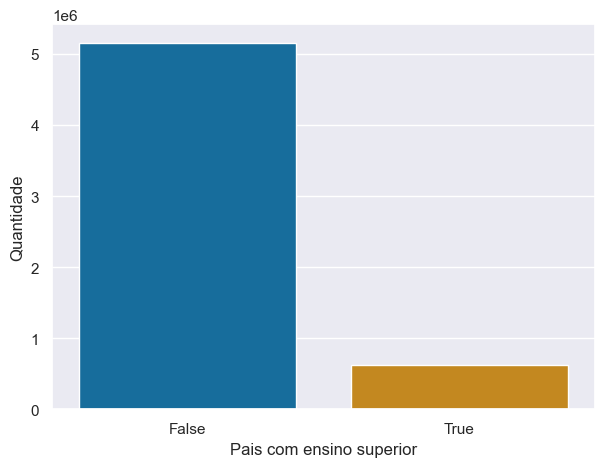

In [213]:
ax=sns.countplot(data=df_enem, x='pai_possui_superior', palette='colorblind')
ax.set(xlabel='Pais com ensino superior')
ax.set(ylabel='Quantidade')

### Analisando a quantidade de maes com ensino superior

In [88]:
df_enem['mae_possui_superior'].value_counts(normalize=True) * 100

False   83.29
True    16.71
Name: mae_possui_superior, dtype: float64

[Text(0, 0.5, 'Quantidade')]

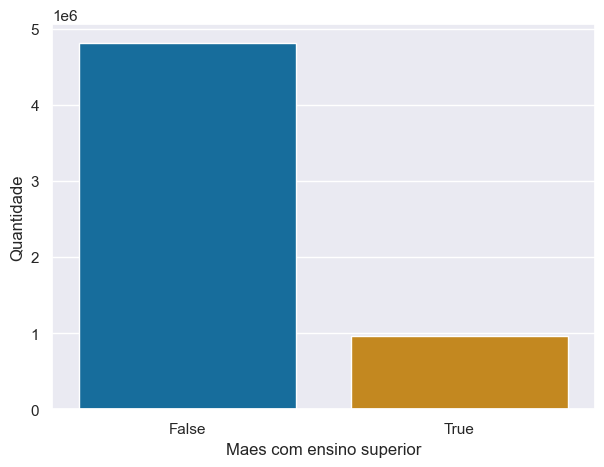

In [215]:
ax=sns.countplot(data=df_enem, x='mae_possui_superior', palette='colorblind')
ax.set(xlabel='Maes com ensino superior')
ax.set(ylabel='Quantidade')

## Analisando a renda familiar
- A    Nenhuma Renda
- B    Até RS 1.045,00
- C    De RS 1.045,01 até RS 1.567,50
- D    De RS 1.567,51 até RS 2.090,00
- E    De RS 2.090,01 até RS 2.612,50
- F    De RS 2.612,51 até RS 3.135,00
- G    De RS 3.135,01 até RS 4.180,00
- H    De RS 4.180,01 até RS 5.225,00
- I    De RS 5.225,01 até RS 6.270,00
- J    De RS 6.270,01 até RS 7.315,00
- K    De RS 7.315,01 até RS 8.360,00
- L    De RS 8.360,01 até RS 9.405,00
- M    De RS 9.405,01 até RS 10.450,00
- N    De RS 10.450,01 até RS 12.540,00
- O    De RS 12.540,01 até RS 15.675,00
- P    De RS 15.675,01 até RS 20.900,00
- Q    Acima de RS 20.900,00

In [92]:
from string import ascii_uppercase

dicionario_renda = dict()

# iterando sobre o alfabeto
for i, letra in enumerate(ascii_uppercase):
    if i == 17:
        break
    dicionario_renda[letra] = i

dicionario_renda


{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16}

In [91]:
# funcao de mapeamento
df_enem['renda_familiar'] = df_enem['Q006'].map(dicionario_renda)

df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pai_possui_superior,mae_possui_superior,renda_familiar
0,11,F,1,2,1,1,11,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,False,NaN
1,11,M,2,3,1,1,11,1,NaN,0,None,NaN,NaN,NaN,RN,1,1,1,1,604.10,661.70,595.30,711.30,1,1.00,120.00,120.00,120.00,120.00,100.00,580.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,False,NaN
2,4,F,2,3,2,2,0,2,1.00,0,BA,2.00,1.00,1.00,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.00,B,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,A,False,False,1.00
3,2,M,1,3,1,2,0,2,1.00,0,SP,3.00,1.00,1.00,SP,1,1,1,1,620.80,675.00,624.20,759.40,0,1.00,140.00,200.00,140.00,120.00,160.00,760.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,False,NaN
4,4,F,1,3,2,1,1,1,NaN,0,None,NaN,NaN,NaN,MG,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.00,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,False,True,1.00


[Text(0, 0.5, 'Quantidade')]

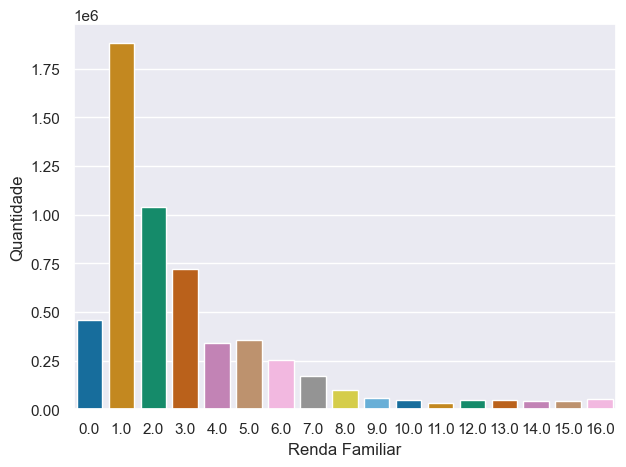

In [217]:
ax=sns.countplot(data=df_enem, x='renda_familiar', palette='colorblind')
ax.set(xlabel='Renda Familiar')
ax.set(ylabel='Quantidade')

# <a>Relacionando notas com características dos candidatos</a>

Avaliar se as notas dos candidatos é diferente com relação a:
- sexo
- raça
- estado civil
- escolaridade dos pais
- renda familiar


In [103]:
# Criando um df com as notas e sexo dos candidatos
df_sexo = df_enem.loc[:, coluna_notas + ['TP_SEXO']]
df_sexo.head(10)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO
0,NaN,NaN,NaN,NaN,NaN,F
1,604.10,661.70,595.30,711.30,580.00,M
2,NaN,NaN,NaN,NaN,NaN,F
3,620.80,675.00,624.20,759.40,760.00,M
4,NaN,NaN,NaN,NaN,NaN,F
5,498.10,604.70,505.40,526.70,700.00,F
6,NaN,NaN,NaN,NaN,NaN,M
7,604.60,604.80,562.10,753.20,600.00,M
8,439.70,383.50,486.20,448.50,600.00,F
9,NaN,NaN,NaN,NaN,NaN,M


## Analisando as notas por sexo


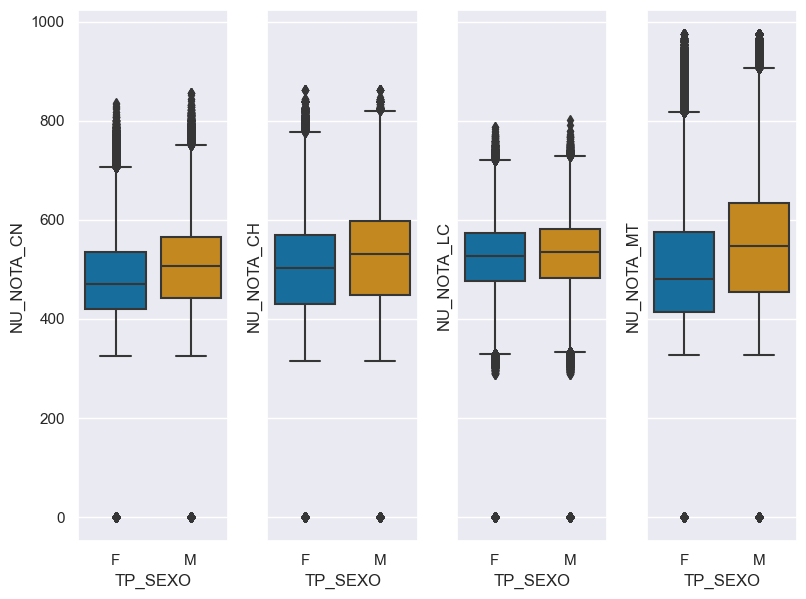

In [218]:
sns.set_style('darkgrid')
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8, 6))
plt.tight_layout()

for i in range(4):
    coluna_1 = coluna_notas[i]
    sns.boxplot(data=df_sexo, y=coluna_1, x='TP_SEXO', ax=graficos[i], palette='colorblind')

## Analisando as notas por raça


In [106]:
# Criando um df com as notas e raças dos candidatos
df_raca = df_enem.loc[:, coluna_notas +['TP_COR_RACA']]
df_raca.head(10)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_COR_RACA
0,NaN,NaN,NaN,NaN,NaN,2
1,604.10,661.70,595.30,711.30,580.00,3
2,NaN,NaN,NaN,NaN,NaN,3
3,620.80,675.00,624.20,759.40,760.00,3
4,NaN,NaN,NaN,NaN,NaN,3
5,498.10,604.70,505.40,526.70,700.00,3
6,NaN,NaN,NaN,NaN,NaN,3
7,604.60,604.80,562.10,753.20,600.00,1
8,439.70,383.50,486.20,448.50,600.00,3
9,NaN,NaN,NaN,NaN,NaN,2


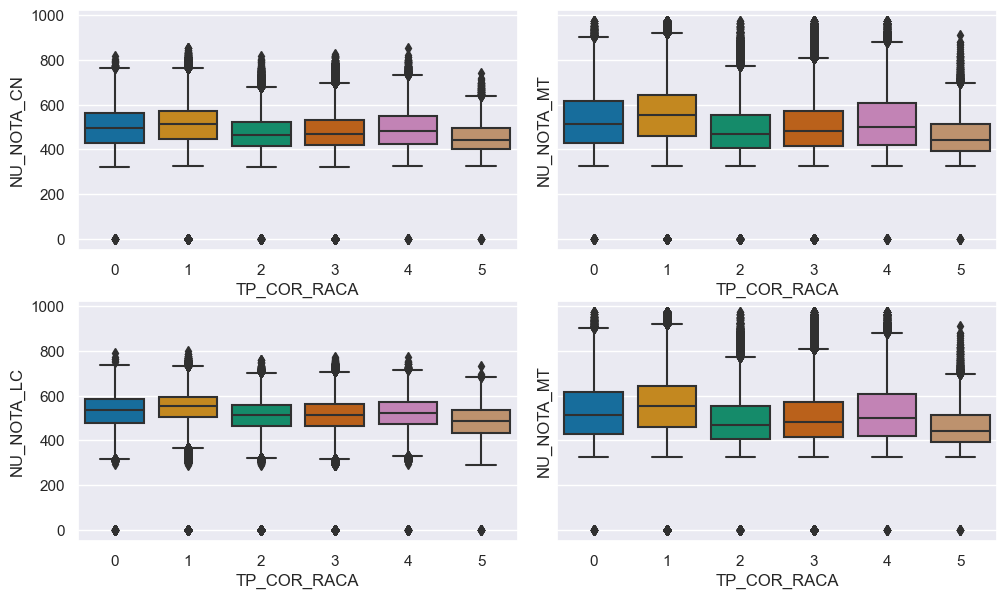

In [220]:
sns.set_style('darkgrid')
figura, graficos = plt.subplots(2, 2, sharey=True, figsize=(10, 6))
plt.tight_layout()

for i in range(2):
    coluna_1 = coluna_notas[i*2]
    coluna_2 = coluna_notas[1*2+1]
    sns.boxplot(data=df_raca, y=coluna_1, x='TP_COR_RACA', ax=graficos[i][0], palette='colorblind')
    sns.boxplot(data=df_raca, y=coluna_2, x='TP_COR_RACA', ax=graficos[i][1], palette='colorblind')

## Analisando as notas por nivel de instrucao dos pais


In [119]:
# criando df com as notas e nível de instrucao dos pais e maes
df_instrucao_pais = df_enem.loc[:, coluna_notas + ['pai_possui_superior', 'mae_possui_superior']]
df_instrucao_pais.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,pai_possui_superior,mae_possui_superior
0,NaN,NaN,NaN,NaN,NaN,False,False
1,604.10,661.70,595.30,711.30,580.00,False,False
2,NaN,NaN,NaN,NaN,NaN,False,False
3,620.80,675.00,624.20,759.40,760.00,False,False
4,NaN,NaN,NaN,NaN,NaN,False,True


### Notas por nível de instruçao do pai

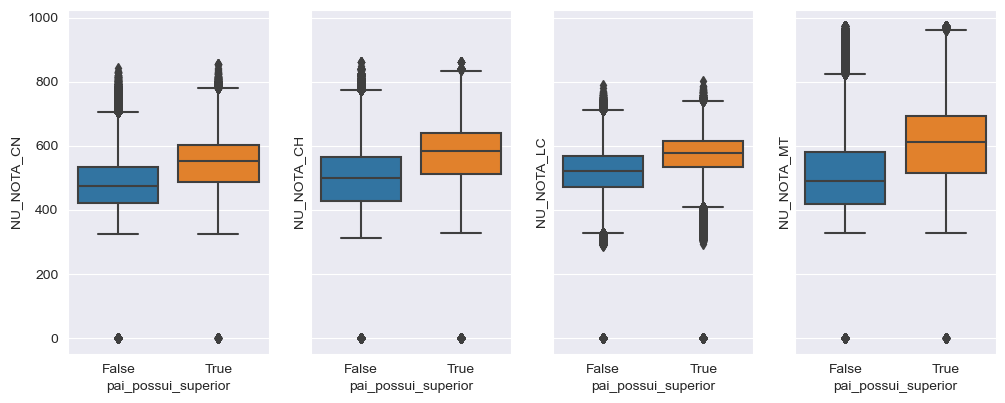

In [120]:
sns.set_style('darkgrid')
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(10, 4))
plt.tight_layout()

for i in range(4):
    coluna_1 = coluna_notas[i]
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='pai_possui_superior', ax=graficos[i])

### Notas por nível de instruçao da mae

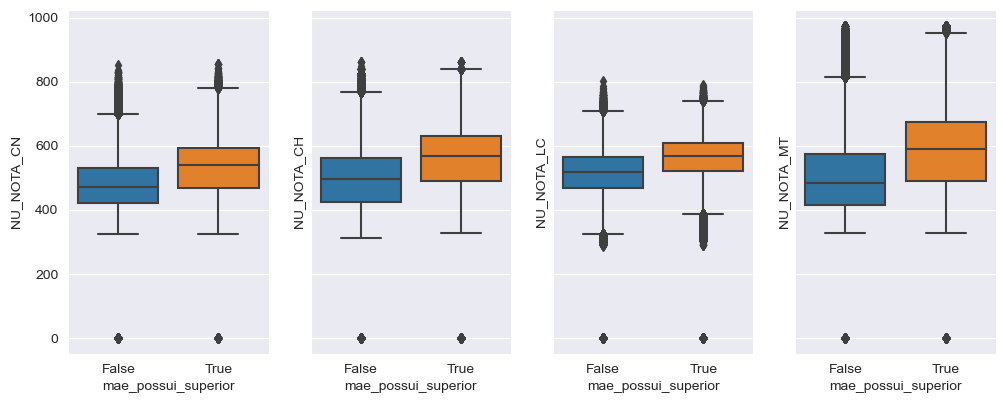

In [121]:
sns.set_style('darkgrid')
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(10, 4))
plt.tight_layout()

for i in range(4):
    coluna_1 = coluna_notas[i]
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='mae_possui_superior', ax=graficos[i])

## Analisando a renda familiar

<Axes: xlabel='renda_familiar', ylabel='NU_NOTA_CN'>

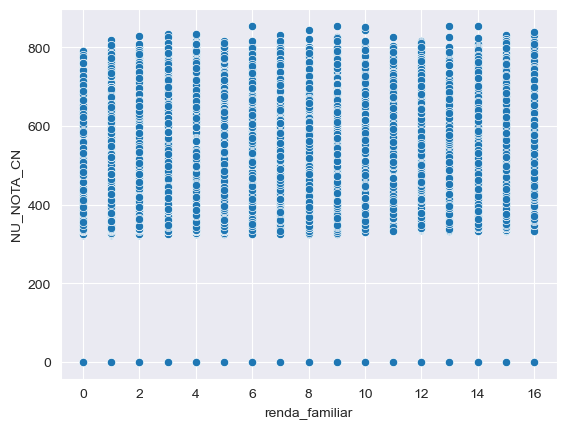

In [126]:
df_renda = df_enem.loc[:, coluna_notas + ['renda_familiar']]

sns.scatterplot(data=df_renda, x='renda_familiar', y='NU_NOTA_CN')

<Axes: >

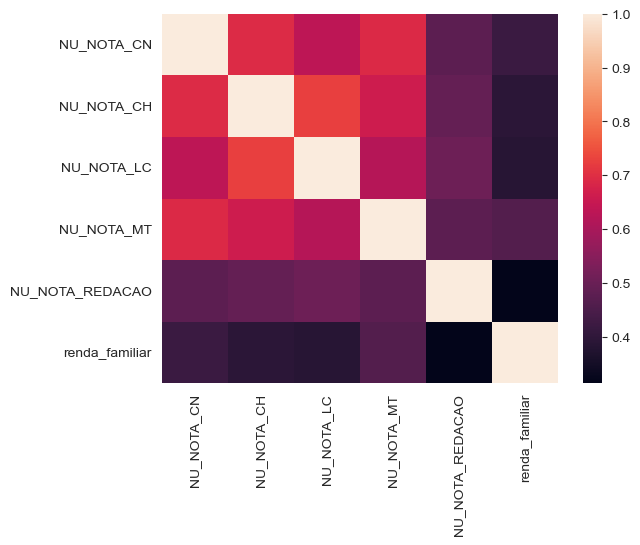

In [129]:
correlacoes_renda = df_renda.corr()
sns.heatmap(correlacoes_renda)

## <a> Conclusões </a>

Depois de analisar os dados com o objetivo de avaliar possíveis relações entre características e notas dos candidatos, podemos afirmar que existe alguma evidência de que há correlações entre as notas:
- raça - Indígenas tem uma média menor que todas as outras raças
- escolaridade dos pais - Candidatos com pais com nível superior tem, em média, notas maiores, principalmente em matemática
- renda familiar na nota de matemática - Existe uma correlaçao acima de 0.5 entre renda familiar e notas de matemática
- nota de redaçao e nota de linguagens e codigos - Existe uma correlaçao proxima a 0.5 entre as notas de redacao e as notas de linguagens e codigos

A maioria dos candidatos possui renda inferior a R$2.612,50

O candidato médio do ENEM é mulher, com 18 anos, solteira, parda, com renda familiar inferior a R$1.567,50 com pai e mãe sem ensino superior completo.